In [1]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tabulate

In [16]:
# import required module for removing letter accents
from unidecode import unidecode

In [13]:
df_brazil_tweets = pd.read_csv('brazil_states_tweet_count.csv')
df_brazil_shortage = pd.read_csv('resources_data_used_for_india.csv')

In [14]:
df_brazil_tweets

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
0,2020-02-03,3,1,0,4,0.750000,0.000000,0.250000,Acre
1,2020-02-06,0,3,0,3,0.000000,0.000000,1.000000,Acre
2,2020-02-07,0,3,0,3,0.000000,0.000000,1.000000,Acre
3,2020-02-10,1,0,0,1,1.000000,0.000000,0.000000,Acre
4,2020-02-11,1,0,0,1,1.000000,0.000000,0.000000,Acre
...,...,...,...,...,...,...,...,...,...
11080,2021-03-27,38,83,4,125,0.304000,0.032000,0.664000,Tocantins
11081,2021-03-28,52,46,1,99,0.525253,0.010101,0.464646,Tocantins
11082,2021-03-29,35,60,5,100,0.350000,0.050000,0.600000,Tocantins
11083,2021-03-30,19,49,8,76,0.250000,0.105263,0.644737,Tocantins


In [15]:
df_brazil_shortage

,location_id,date,version_name,location_name,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
0,1,2021-01-01,reference,Global,7171462.40,7748841.00,6504160.91,5138739.00,4187604.70,6211368.67,...,0.000047,0.000005,94949.201640,116626.534341,80505.804654,17518594.0,536960.0,0.0040,0.0985,0.0145
1,1,2021-01-02,reference,Global,7110153.50,7706397.04,6443465.35,5165413.36,4209719.81,6242896.94,...,0.000058,0.000016,95647.686647,117544.005117,81063.672212,17518594.0,536960.0,0.0040,0.0995,0.0145
2,1,2021-01-03,reference,Global,7050964.73,7658904.81,6383773.17,5192194.27,4231918.50,6274529.92,...,0.000073,0.000022,96322.317115,118224.114780,81504.320156,17518594.0,536960.0,0.0041,0.1008,0.0145
3,1,2021-01-04,reference,Global,6980448.94,7597716.05,6314841.94,5219002.94,4254147.30,6306177.33,...,0.000078,0.000027,96837.844871,118724.871543,81890.241343,17518594.0,536960.0,0.0041,0.1014,0.0145
4,1,2021-01-05,reference,Global,6887957.60,7554235.30,6205486.35,5246285.21,4276799.00,6338358.25,...,0.000081,0.000035,97512.348885,119551.065884,82414.317725,17518594.0,536960.0,0.0042,0.1026,0.0145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289250,60392,2020-12-27,reference,Thuringia,2825.36,3250.61,2313.29,1089.55,944.72,1319.71,...,0.000000,0.000000,74.111633,74.111633,74.111633,NaN,NaN,0.0184,0.2842,0.0251
289251,60392,2020-12-28,reference,Thuringia,2831.01,3235.55,2348.37,1126.93,977.10,1365.05,...,0.000000,0.000000,73.693265,73.693265,73.693265,NaN,NaN,0.0189,0.2917,0.0262
289252,60392,2020-12-29,reference,Thuringia,2820.14,3262.11,2375.72,1164.87,1009.95,1411.06,...,0.000000,0.000000,74.478980,74.478980,74.478980,NaN,NaN,0.0185,0.2970,0.0269
289253,60392,2020-12-30,reference,Thuringia,2786.02,3238.20,2358.20,1203.18,1043.13,1457.52,...,0.000000,0.000000,75.948367,75.948367,75.948367,NaN,NaN,0.0179,0.2968,0.0275


In [31]:
df_brazil_tweets['state'] = df_brazil_tweets['state'].apply(lambda x: unidecode(x))
df_brazil_shortage['location_name'] = df_brazil_shortage['location_name'].apply(lambda x: unidecode(x))

# rename 'Distrito Federal'
df_brazil_shortage['location_name'] = df_brazil_shortage['location_name'].apply(lambda x: 'Federal District' if x == 'Distrito Federal' else x)

In [32]:
state_list = [
  "Acre",
  "Alagoas",
  "Amazonas",
  "Amapá", 
  "Bahia", 
  "Ceará", 
  "Federal District", # old "Distrito Federal"
  "Espírito Santo", 
  "Goiás", 
  "Maranhão", 
  "Minas Gerais", 
  "Mato Grosso do Sul", 
  "Mato Grosso", 
  "Pará", 
  "Paraíba", 
  "Paraná", 
  "Pernambuco", 
  "Piauí", # old "Piaui"
  "Rio de Janeiro", 
  "Rio Grande do Norte", 
  "Rondônia", 
  "Roraima", 
  "Rio Grande do Sul", 
  "Santa Catarina", 
  "Sergipe", 
  "São Paulo", 
  "Tocantins"]

In [33]:
state_list = [unidecode(s) for s in state_list]

In [34]:
def get_state_dataseries_merged(df_tweets, df_resources, state_name, start_date, end_date):
    # take the data from one state and within time range
    df_tweets_selected    = df_tweets.loc[
        (df_tweets['state'] == state_name) &
        (df_tweets['date_time'] >= start_date) &
        (df_tweets['date_time'] < end_date)
    ].sort_values('date_time')
    df_resources_selected = df_resources.loc[
        (df_resources['location_name'] == state_name) &
        (df_resources['date'] >= start_date) &
        (df_resources['date'] < end_date)
    ].sort_values('date')
    
    if len(df_tweets_selected) == 0 or len(df_resources_selected) == 0:
        return None
    
    # merge the two tables
    df_merged = pd.merge(df_tweets_selected, df_resources_selected, 
                         left_on='date_time', right_on='date',
                         how='inner').drop('date_time', axis=1).sort_values('date')
    
    return df_merged

In [35]:
def model_series_ccm(X, Y, tau, E, L_min):
    # create origin model
    ccm0 = ccm(X, Y, tau, E, len(X))
    
    L_range = range(L_min, len(X), 1) # L values to test
    
    # loop extending L from min to full length of dataset to test convergence
    Xhat_My, Yhat_Mx = [], [] # correlation list
    for L in L_range: 
        ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
        Xhat_My.append(ccm_XY.causality()[0])
        Yhat_Mx.append(ccm_YX.causality()[0])
    
    return ccm0, Xhat_My, Yhat_Mx

In [58]:
start_date = '2020-02-01'
end_date   = '2021-04-01'

In [59]:
results_per_states = {}

# now look through each state for causation correlation
for subdivision in tqdm(state_list):
    df_merged = get_state_dataseries_merged(df_brazil_tweets, df_brazil_shortage, subdivision, start_date, end_date)
    
    if df_merged is None:
        print('no data for: ', subdivision)
        continue
    
    # extract the X and Y
    X = df_merged['neg'].to_numpy()
    Y = df_merged['icu_beds_mean'].to_numpy()
    
    res = model_series_ccm(X, Y, tau=1, E=8, L_min=40)
    
    results_per_states[subdivision] = res

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [03:31<00:00,  7.82s/it]


In [60]:
# now show the results
table_data = []
table_data.append(['subdivision name', 'cor', 'p', 'X->Y', 'Y->X'])

for subdivision in results_per_states:
    ccm0, Xhat_My, Yhat_Mx = results_per_states[subdivision]
    corr_, p = ccm0.causality()
    table_data.append([subdivision] + [float('%.3g' % n) for n in [corr_, p, Xhat_My[-1], Yhat_Mx[-1]]])

In [61]:
table = tabulate.tabulate(table_data, tablefmt='html')
table

subdivision name,cor,p,X->Y,Y->X
Acre,0.58,9.33e-37,0.58,0.723
Alagoas,0.601,3.38e-41,0.601,0.625
Amazonas,0.801,4.62e-92,0.801,0.85
Amapa,0.0751,0.14,0.0758,0.627
Bahia,0.594,4.01e-40,0.594,0.486
Ceara,0.314,9.8e-11,0.317,0.718
Federal District,0.272,2.73e-08,0.26,0.172
Espirito Santo,0.194,8.99e-05,0.194,0.415
Goias,0.329,1.43e-11,0.329,0.249
Maranhao,0.397,1.87e-16,0.396,0.728


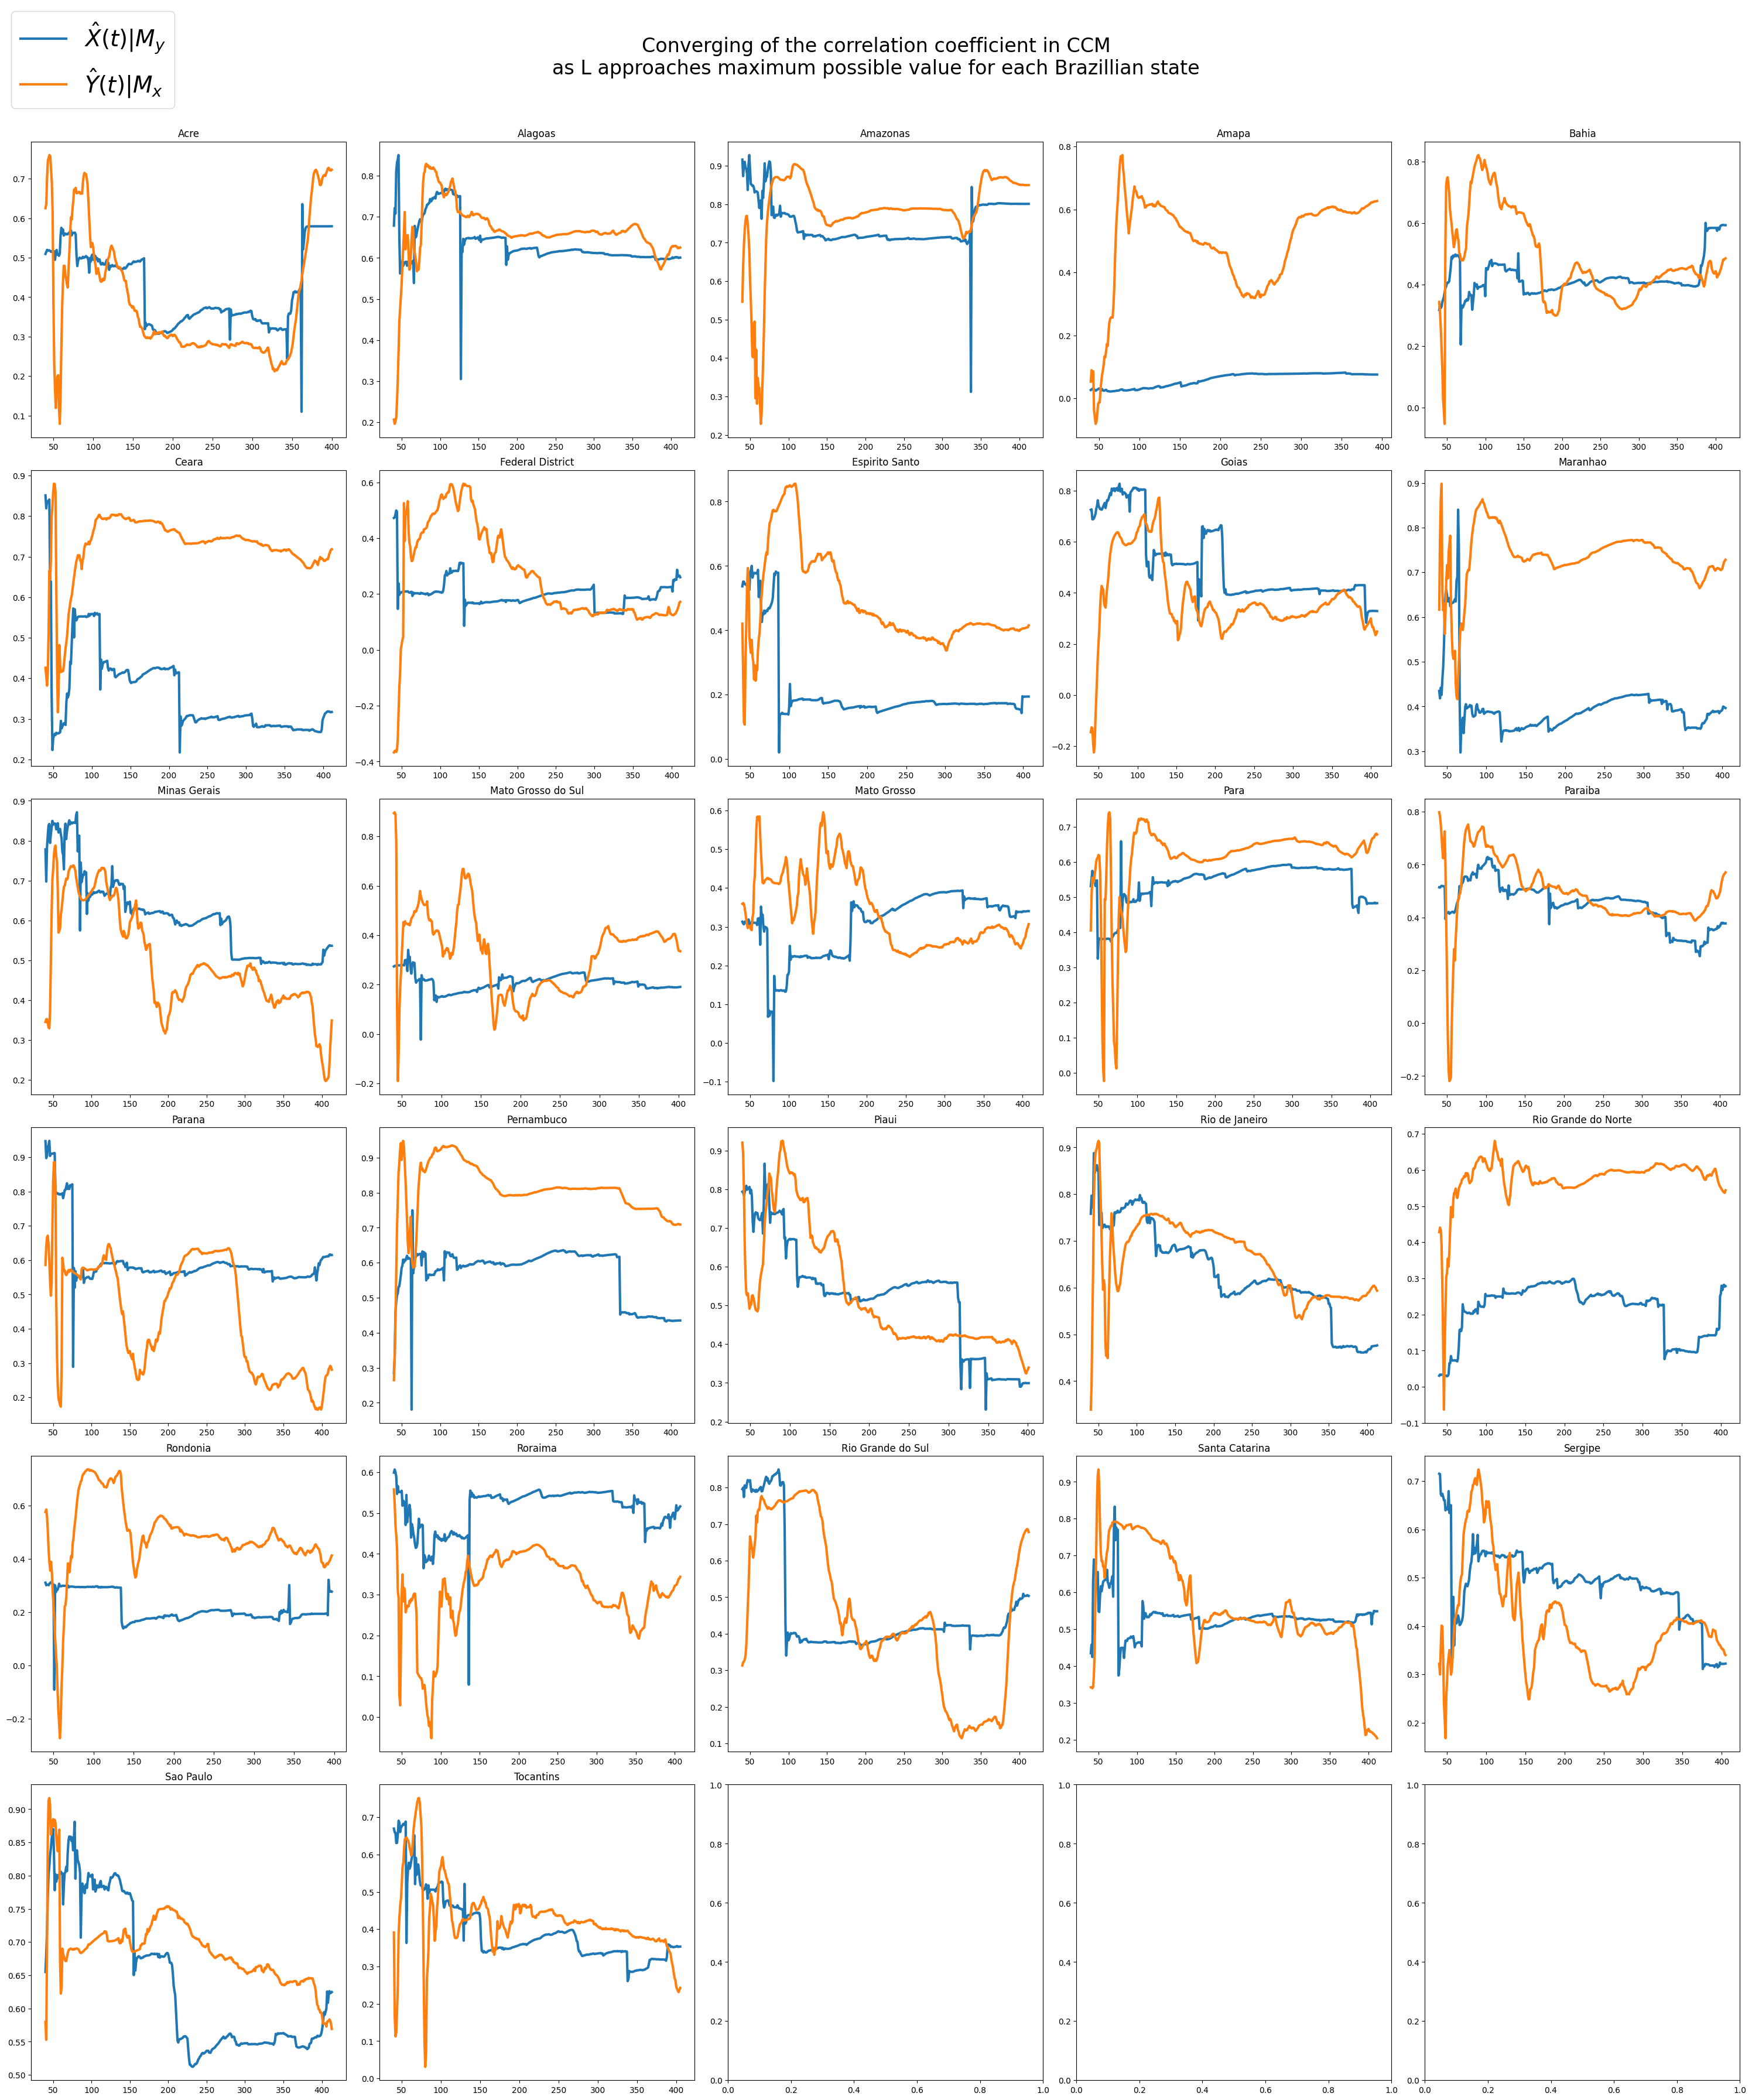

In [62]:
collage_w = 5
collage_h = 6

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(collage_h, collage_w, figsize=(30,36))

ct = 0

for subdivision in results_per_states:
    ccm0, Xhat_My, Yhat_Mx = results_per_states[subdivision]
    
    # the array of the range of L, can be different for each state
    L_range = np.arange(len(Xhat_My)) + 40
    
    p = axis[ct // collage_w, ct % collage_w]
    
    #p.figure(figsize=(5,5))
    p.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$',linewidth=3.0)
    p.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$',linewidth=3.0)
    #p.xlabel('L', size=12)
    #p.ylabel('correl', size=12)
    #p.legend(prop={'size': 12})
    p.set_title(subdivision)
    
    ct += 1

handles, labels = axis[0, 0].get_legend_handles_labels()
figure.legend(handles, labels, loc='upper left', prop={'size': 28})
#figure.legend(prop={'size': 12})

figure.tight_layout(pad=1.0)

figure.subplots_adjust(top=0.93)
figure.suptitle('Converging of the correlation coefficient in CCM\nas L approaches maximum possible value for each Brazillian state', fontsize=24)

plt.savefig('brazil_collage_5.png')

In [63]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

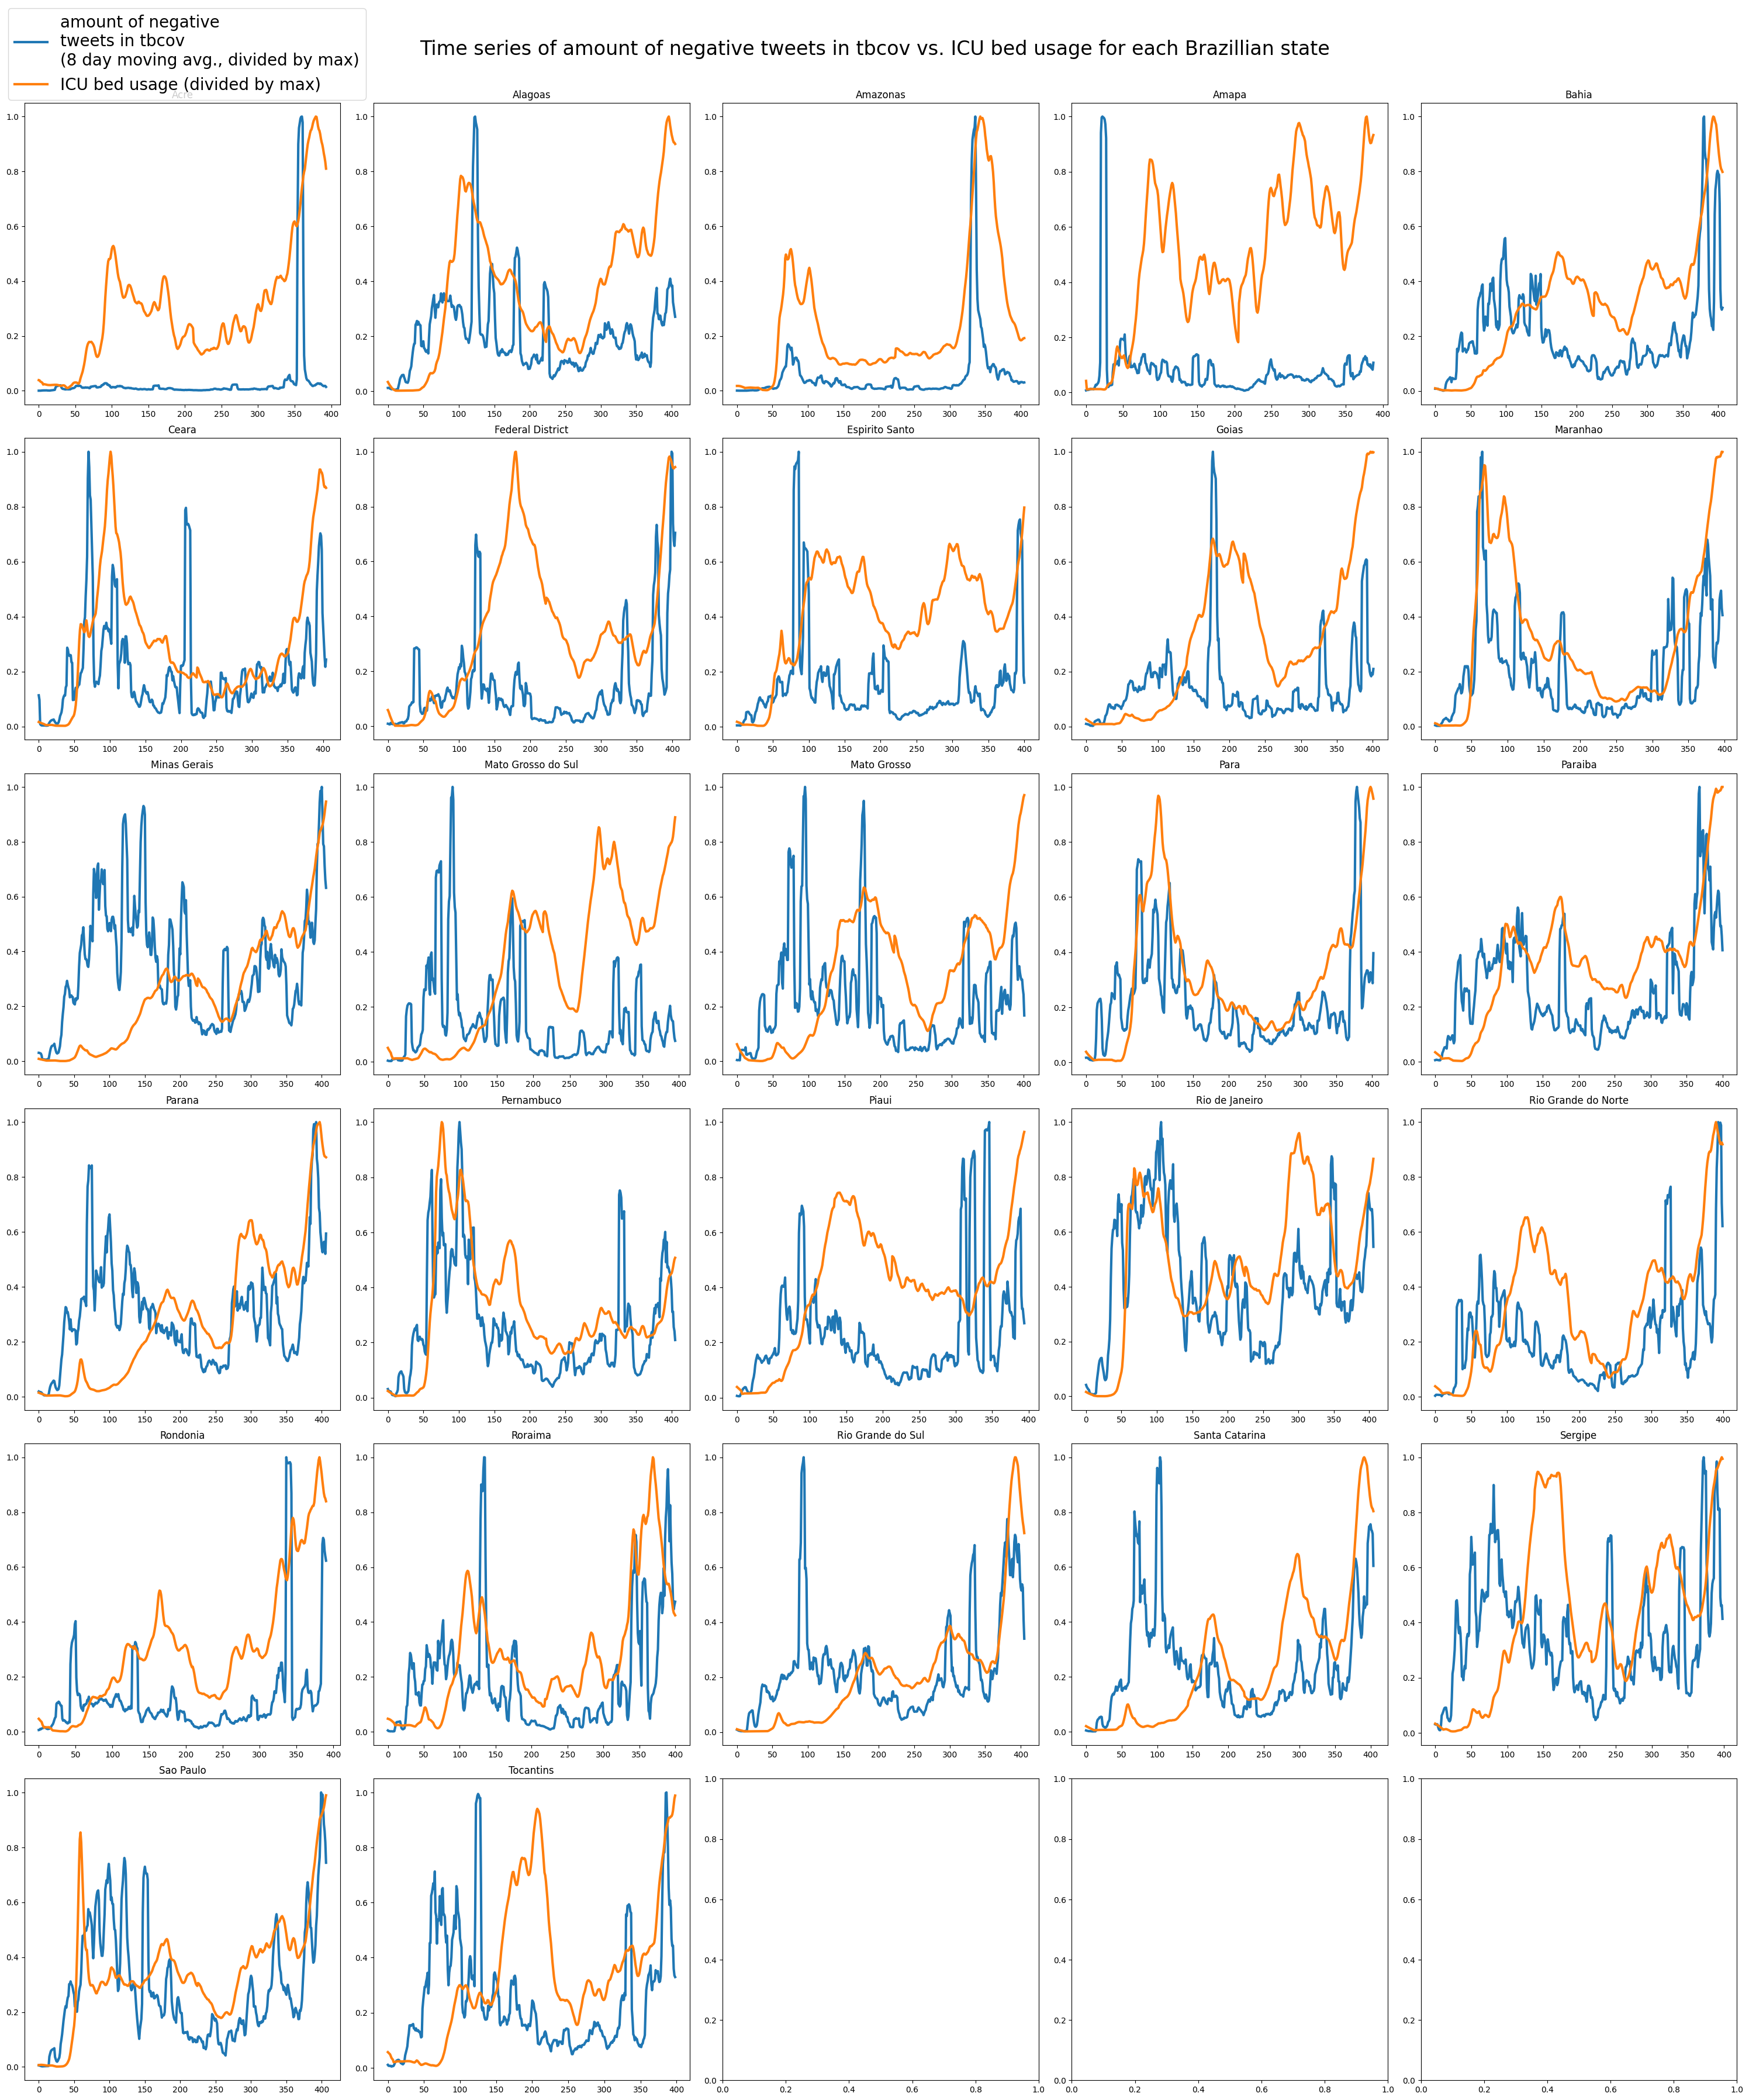

In [64]:
collage_w = 5
collage_h = 6

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(collage_h, collage_w, figsize=(30,36))

ct = 0

for subdivision in results_per_states:
    df_merged = get_state_dataseries_merged(df_brazil_tweets, df_brazil_shortage, subdivision, start_date, end_date)
    
    if df_merged is None:
        print('no data for: ', subdivision)
        continue
    
    # extract the X and Y
    X = df_merged['neg'].to_numpy()
    Y = df_merged['icu_beds_mean'].to_numpy()
    has_nan = np.isnan(Y)
    if has_nan.any():
        not_nan = np.logical_not(has_nan)
        X = X[not_nan]
        Y = Y[not_nan]
    
    X = moving_average(X, n=8)
    Y = (Y / np.amax(Y))[:len(X)]
    X = (X / np.amax(X))
    
    # the array of the range of L, can be different for each state
    day_range = np.arange(len(X))
    
    p = axis[ct // collage_w, ct % collage_w]
    
    #p.figure(figsize=(5,5))
    p.plot(day_range, X, label='amount of negative\ntweets in tbcov\n(8 day moving avg., divided by max)',linewidth=3.0)
    p.plot(day_range, Y, label='ICU bed usage (divided by max)',linewidth=3.0)
    #p.xlabel('L', size=12)
    #p.ylabel('correl', size=12)
    #p.legend(prop={'size': 12})
    p.set_title(subdivision)
    
    ct += 1

handles, labels = axis[0, 0].get_legend_handles_labels()
figure.legend(handles, labels, loc='upper left', prop={'size': 20})
#figure.legend(prop={'size': 12})

figure.tight_layout(pad=1.0)

figure.subplots_adjust(top=0.95)
figure.suptitle('Time series of amount of negative tweets in tbcov vs. ICU bed usage for each Brazillian state', fontsize=24)

plt.savefig('brazil_collage_time_4.png')

In [30]:
# inputs
tau = 1 # time lag
E = 8 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

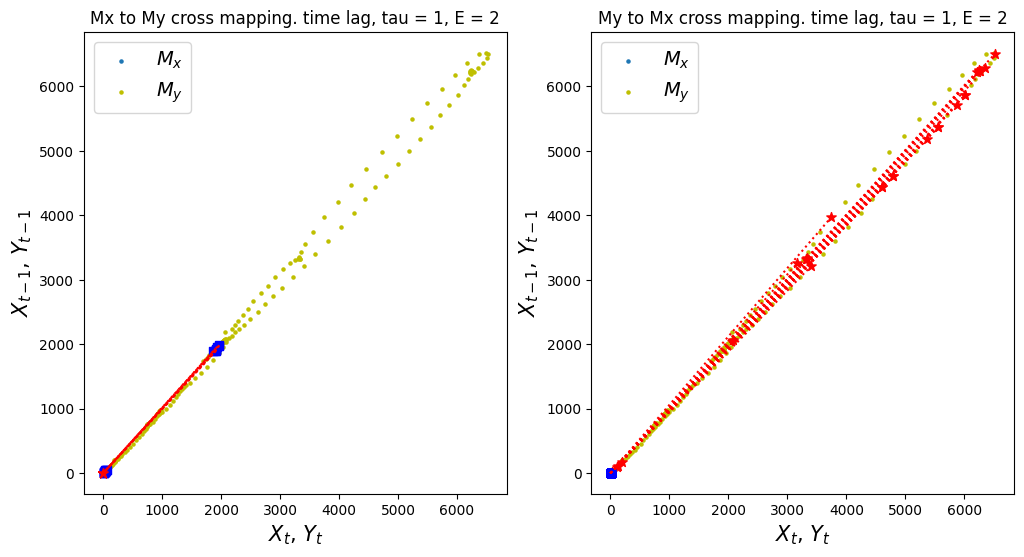

In [31]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [32]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.46705977941775306, 7.294551011906903e-14)

In [33]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

IndexError: index 0 is out of bounds for axis 0 with size 0

X->Y r 0.47 p value 0.0
Y->X r 0.71 p value 0.0


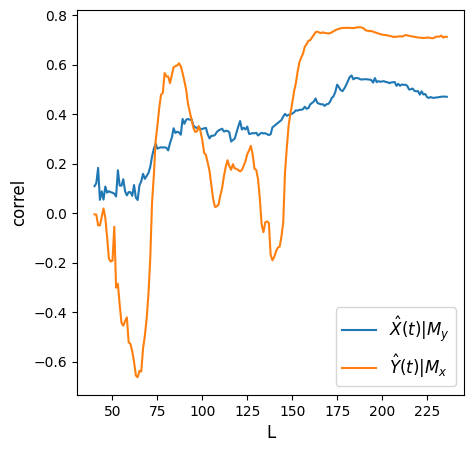

In [35]:
# checking convergence
# Looking at "convergence"
L_range = range(40, len(X), 1) # L values to test
tau = 1
E = 8

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})